In [1]:
%load_ext autotime
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from vincentnet.neural_net import NeuralNetwork

import mnist

time: 6.32 s


In [3]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28))).astype(np.uint8)
    plt.imshow(two_d, cmap='gray')
    return plt

time: 2.1 ms


In [4]:
images, labels = mnist.train_images().reshape(-1, 28*28), mnist.train_labels()
test_images, test_labels = mnist.test_images().reshape(-1, 28*28), mnist.test_labels()

X = np.array(images)
X_std = X.std()
X_mean = X.mean()
X = (X - X_mean) / X_std

y = np.array(labels)

X_test = (np.array(test_images) - X_mean) / X_std
y_test = np.array(test_labels)

time: 7.44 s


In [5]:
X_train = X[:50000]
X_validation = X[50000:]

y_train = y[:50000]
y_validation = y[50000:]

time: 1.88 ms


In [9]:
nn = NeuralNetwork(D=784, k=10, layers=[300, 100], step_size = .001, reg = .005)
batch_size = 264
s = 0
training_info = []

time: 11.2 ms


In [ ]:
for s in range(s, s+100000):
    batch = np.array(range(batch_size*s, batch_size*s+batch_size))%X_train.shape[0]
    l = nn.step(X_train[batch, :], y_train[batch])
    
    if s%5000==0:
        print 'Loss at step {}: {:0.5f}\n\tValidation Accuracy: {:}\t'.format(s, l, nn.get_accuracy(X_validation, y_validation))
        nn.step_size *= .99
        training_info.append({'loss': l,
                              'step': s,
                              'train_accuracy': nn.get_accuracy(X_train, y_train),
                              'validation_accuracy': nn.get_accuracy(X_validation, y_validation)})

Loss at step 0: 2.36870
	Validation Accuracy: 0.1115	


In [107]:
nn.get_accuracy(X_test, y_test)

0.9723

time: 116 ms


In [108]:
train_df = pd.DataFrame(training_info).sort_values('step')

time: 3.22 ms


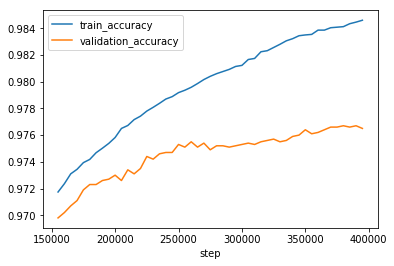

time: 217 ms


In [110]:
(train_df.set_index('step')[['train_accuracy', 'validation_accuracy']]
 .query('step > 150000')
 .plot())

### Inspect the Errors

In [111]:
preds = nn.predict(X_test)
v = enumerate(zip(preds, y_test))

time: 93.5 ms


Index 8: Model thought 5 was 6


<module 'matplotlib.pyplot' from '/Users/vincentstigliani/Envs/mnist/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

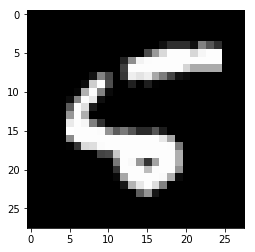

time: 161 ms


In [112]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print 'Index {}: Model thought {} was {}'.format(a, c, b)
gen_image(test_images[a])